In [1]:
from rebin_data import RebinData
import numpy as np
import torch
import matplotlib.pyplot as plt
from read_fk_table import get_fk_table
from read_faserv_pdf import read_pdf
from ML_fit_neutrinos.read_LHEF import read_hist

In [2]:
# Read rebinned data
luminosity_factor = 2
init_bins = 120
min_num_events = 0
filename = 'El.dat'
binwidth = (2000-25)/40
data,Enu,_,_ =read_hist(filename,binwidth)

# Enu,data = rebinned_data.rebin_eq_binwidth()

print(f'Enu ={Enu}')
print(f'pred = {data}')

Enu =[  74.375  123.75   173.125  222.5    271.875  321.25   370.625  420.
  469.375  518.75   568.125  617.5    666.875  716.25   765.625  815.
  864.375  913.75   963.125 1012.5   1061.875 1111.25  1160.625 1210.
 1259.375 1308.75  1358.125 1407.5   1456.875 1506.25  1555.625 1605.
 1654.375 1703.75  1753.125 1802.5   1851.875 1901.25  1950.625 2000.   ]
pred = [ 0.          3.54556854  9.25358403 11.9656244  13.76350344 14.31827995
 14.32497619 14.28423391 13.83927234 13.09076807 12.58557739 11.97766351
 11.27020666 10.50714467  9.60792964  9.14106828  8.60208633  7.95783639
  7.18722793  7.03166311  6.17119313  5.89703795  5.89635509  5.51087904
  5.04885544  4.74436243  4.31145324  4.17190591  3.75641771  3.36535917
  3.41092158  3.13124286  2.88407186  2.68471279  2.5498279   2.38797714
  2.03813058  2.07590364  1.78948247  1.65266099]


In [3]:
def compute_errors(pred,pred_min,pred_max):
    """Compute total sigma error on data and covariance matrix

    Args:
        pred (list): central data
        pred_min (list): minimum data
        pred_max (list): max data

    Returns:
        tuple: covariance matrix and total error
    """
    # compute systematic error on data
    delta_plus = pred_max - pred
    delta_min = pred_min- pred
    semi_diff = (delta_plus + delta_min) / 2
    average = (delta_plus - delta_min) / 2
    sig_sys = np.sqrt(average * average + 2 * semi_diff * semi_diff)

    # compute covariance matrix of data
    sig_tot = sig_sys**2 + pred
    cov_matrix = sig_tot 
    cov_matrix = np.diag(sig_tot)
    cov_matrix = np.linalg.inv(cov_matrix)
    cov_matrix = torch.tensor(cov_matrix, dtype=torch.float32,requires_grad=False)

    return sig_sys, sig_tot, cov_matrix

# sig_sys,sig_tot, cov_matrix = compute_errors(data,data_min,data_max)
sig_sys = 1
sig_tot = 1
cov_matrix = np.ones(40)
cov_matrix = np.diag(cov_matrix)
cov_matrix = torch.tensor(cov_matrix, dtype=torch.float32,requires_grad=False)
print(cov_matrix)


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


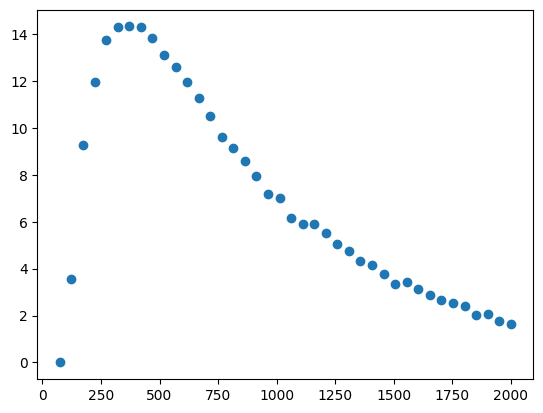

In [4]:
# plt.errorbar(Enu,data,yerr = np.sqrt(sig_tot),fmt = '.')
plt.plot(Enu,data,'o')
plt.show()

In [5]:
x_alpha, fk_table = get_fk_table('FK_El.dat',-5,50)
print(fk_table)
# input_file = "faserv_0000.dat"
faser_pdf,x_faser = read_pdf(-8,250)
print(faser_pdf.shape)

# faser_pdf = faser_pdf[::5]

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -6.6894e-04,
          3.1705e-04,  2.8722e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.4151e-03,
          6.3410e-04,  4.4314e-05],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.4957e-03,
          1.6290e-03,  1.1899e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -3.3190e-03,
          1.3885e-03,  1.0832e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.6757e-03,
          1.5524e-03,  1.0258e-04]])
LHAPDF 6.5.4 loading /opt/anaconda3/envs/ML_fit/share/LHAPDF/faserv/faserv_0000.dat
faserv PDF set, member #0, version 1; LHAPDF ID = 50000001
(250,)


/Users/jukkajohn/Masterscriptie/Codes/ML_fit_neutrinos/src/ML_fit_neutrinos/read_fk_table.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


In [6]:
# x_alpha_faser, fk_table_faser = get_fk_table('FK_El.dat',-5,50)
# num_events_faserv = np.matmul(fk_table_faser,faser_pdf)  
# Enu = np.linspace(0,1,40)
# plt.plot(Enu,num_events_faserv)
# plt.show()

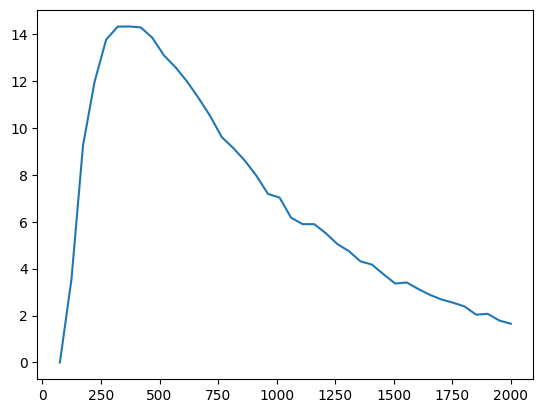

In [7]:
REPLICAS  = 1
def generate_MC_replicas():
    """Generate level 2 data MC replicas for the NN fit by adding a level 1 and then a level 2 gaussian noise to the data

    Returns:
        list: MC replica data
    """

    r_sys = np.random.normal(0,sig_sys)
    r_stat = np.random.normal(0,np.sqrt(data))

    
    MC_data = []
    data_level1 = data + r_sys + r_stat

    for _ in range(REPLICAS):
        r_sys = np.random.normal(0,sig_sys)
        r_stat = np.random.normal(0,np.sqrt(data))

        # data_level2 = data_level1 + r_sys + r_stat
        data_level2 = data
        data_level2 = torch.tensor(data_level2, dtype=torch.float32, requires_grad=False)
        
        MC_data.append(data_level2)
    plt.plot(Enu,data_level2)
    plt.show()
    pred_level1 = torch.tensor(data_level1, dtype=torch.float32)
    return MC_data,pred_level1

MC_data,data_level1 = generate_MC_replicas()



In [8]:
class SimplePerceptron(torch.nn.Module):
    def __init__(self, l1,l2,l3,l4,l5):
        super(SimplePerceptron, self).__init__()
        self.linear = torch.nn.Linear(1,l1)
        self.hidden = torch.nn.Linear(l1,l2)
        self.hidden2 = torch.nn.Linear(l2,l3)
        self.hidden3 = torch.nn.Linear(l3,1)
        self.hidden4 = torch.nn.Linear(l4,l5)
        self.hidden5 = torch.nn.Linear(l5,1)
        self.relu = torch.nn.ReLU()

    def forward(self, y):
        y = self.linear(y)
        y = self.relu(y)
        y = self.hidden(y)
        y = self.relu(y)
        y = self.hidden2(y)
        y = self.relu(y)
        y = self.hidden3(y)
        # y = self.relu(y)
        # y = self.hidden4(y)
        # y = self.relu(y)
        # y = self.hidden5(y)
        
        

        return y

In [9]:
import torch.nn as nn
class CustomPreprocessing(nn.Module):
    def __init__(self, alpha,beta,gamma,a,epsilon):
        super(CustomPreprocessing, self).__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha, dtype=torch.float32, requires_grad=True))
        self.beta = nn.Parameter(torch.tensor(beta, dtype=torch.float32, requires_grad=True))
        self.gamma = nn.Parameter(torch.tensor(gamma, dtype=torch.float32, requires_grad=True))
        self.a = nn.Parameter(torch.tensor(a, dtype=torch.float32, requires_grad=True))
        self.epsilon = nn.Parameter(torch.tensor(epsilon, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * x**(-self.alpha) * (1-x)**self.beta * (1+self.epsilon*x**0.5 + self.gamma*x)
        # return self.a * x

In [10]:
# Combine the preprocessing and MLP in a single model
class PreprocessedMLP(nn.Module):
    def __init__(self, alpha, beta, gamma,a,epsilon,l1, l2, l3,l4,l5):
        super(PreprocessedMLP, self).__init__()
        self.preprocessing = CustomPreprocessing(alpha, beta,gamma,a,epsilon)
        self.mlp = SimplePerceptron(l1, l2, l3,l4,l5)

    def forward(self, x):
        x = self.preprocessing(x)
        x = self.mlp(x)
        return x

In [11]:
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss,self).__init__()
    def forward(self,pred,data):
        print(pred.shape)
        print(data.shape)
        diff = pred - data  # Assuming pred and data already have compatible shapes
        loss = torch.matmul(cov_matrix, diff)  # This should give the desired shape

        loss = (1 / pred.size(0)) * torch.dot(diff.view(-1), loss.view(-1))
        
        return loss

torch.Size([40])
torch.Size([40])
tensor(73.4192, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(54.6784, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(37.9928, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(21.2326, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(7.2023, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(4.0776, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(15.8779, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(15.9901, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(9.1122, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(3.9861, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(3.2135, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(4.9400, grad_fn=<MseLossBackward0>)
torch.Size([40])
torch.Size([40])
tensor(7.0103, grad_fn=<MseLossBackw

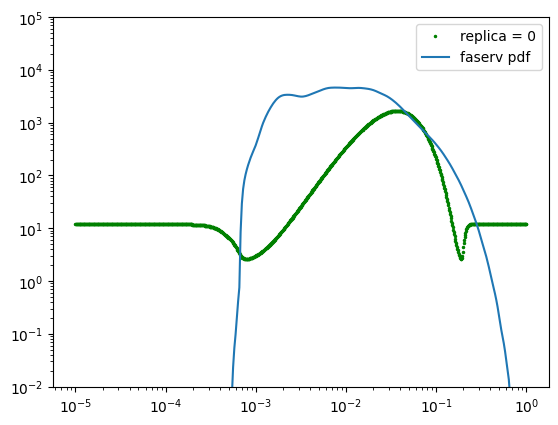

Constrained alpha: -2.2161850929260254
Constrained beta: 71.10865783691406
Constrained gamma: 0.03911549597978592
Constrained a: 47999.94140625
Constrained epsilon: 45999.94140625


In [12]:
fits = []


x_alpha_more_bins = np.logspace(-5,0,1000)
x_alpha_more_bins = torch.tensor(x_alpha_more_bins, dtype=torch.float32).view(-1,1)
x_fit = np.logspace(-5,0,1000)
neutrino_pdfs = []
for i in range(REPLICAS):

    # Instantiate the model
    alpha = -3  # Example alpha value
    beta = 70 # Example beta value
    gamma = 1
    epsilon=46000
    a=48000

    l1=20
    l2=40
    l3=80
    l4 = 40
    l5 = 20

    model = PreprocessedMLP(alpha, beta, gamma,a,epsilon,l1, l2, l3, l4, l5)

    # Loss and optimizer
    # criterion = CustomLoss()
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    MC_data[i] = MC_data[i].squeeze()


    model.train()

    nepochs = 2000 # numer of epoches, i.e. times we iterate through the entire dataset

    for epoch in range(nepochs):

        optimizer.zero_grad()


        y_pred = model(x_alpha)  # Use all data directly
        
        y_pred = torch.matmul(fk_table,y_pred) * binwidth
        y_pred = y_pred.squeeze()

        print(y_pred.shape)
        print(MC_data[i].shape)
        loss = criterion(y_pred, MC_data[i])

        loss.backward()
        optimizer.step()
        print(loss)
    red_chi_square_level1 = criterion(y_pred,MC_data[i])

    print(f"reduced chi^2 level 2 = {loss}")
    print(f"reduced chi^2 level 1 = {red_chi_square_level1}")
    

    y_pred = model(x_alpha_more_bins).detach().numpy().flatten()
    neutrino_pdfs.append(y_pred)
    
    plt.plot(x_fit,y_pred,'go',label=f"replica = {i}",markersize=1.5)
    plt.plot(x_faser,faser_pdf,label ='faserv pdf')
    plt.xscale('log')
    plt.yscale('log')
    # plt.xlim(0.02,1)
    plt.ylim(10**-2,10**5)
    plt.legend()
    plt.show()
    print(f"Constrained alpha: {model.preprocessing.alpha.item()}")
    print(f"Constrained beta: {model.preprocessing.beta.item()}")
    print(f"Constrained gamma: {model.preprocessing.gamma.item()}")
    print(f"Constrained a: {model.preprocessing.a.item()}")
    print(f"Constrained epsilon: {model.preprocessing.epsilon.item()}")


    if loss <100000000:
        y_pred = model(x_alpha)
        y_pred = torch.matmul(fk_table,y_pred) 
        y_pred = y_pred.detach().numpy().flatten()

        # y_pred = y_pred.detach().numpy()
        # y_pred = y_pred.flatten()

        fits.append(y_pred)
# plt.plot(Enu,data_level1,'go',label='best fit',markersize=1.5)

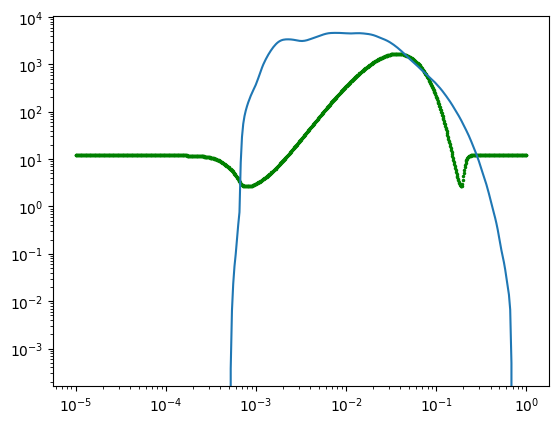

In [13]:
plt.plot(x_fit,np.mean(neutrino_pdfs,axis=0),'go',label=f"replica = {i}",markersize=1.5)
plt.plot(x_faser,faser_pdf,label ='faserv pdf')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [14]:
# MC means and MC errors
mean_fit = np.mean(fits,axis=0)
sigma_fit = np.std(fits,axis=0)
sigma_fit = sigma_fit.flatten()

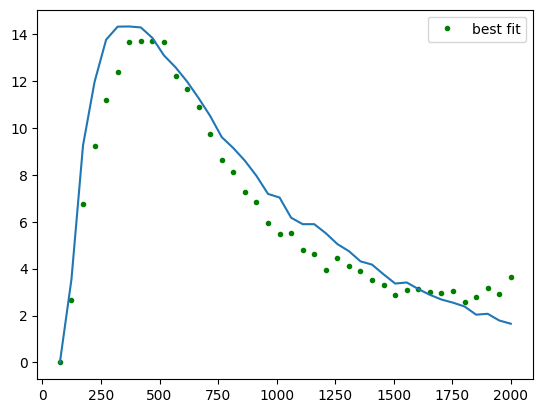

In [15]:
# x_fit = np.logspace(-5,0,1000)
# x_fit  = x_fit[1:]
plt.plot(Enu,mean_fit*binwidth ,'go',label='best fit',markersize=3)
# plt.fill_between(x_fit,mean_fit+sigma_fit,mean_fit-sigma_fit,label='1 sigma error',color = 'red',alpha=0.6)
# plt.plot(Enu,mean_fit,'go',label='best fit',markersize=1.5)
# plt.fill_between(Enu,mean_fit+sigma_fit,mean_fit-sigma_fit,label='1 sigma error',color = 'red',alpha=0.6)
# print(data)
# print(Enu)
plt.plot(Enu,data)
# plt.errorbar(Enu,data,yerr = np.sqrt(sig_tot),label = 'mean data',fmt = '.')
# plt.xlabel('Enu')
# plt.ylabel('N_int')
plt.legend()    

# plt.savefig('level_2_ML_fit.pdf')

plt.show()


/var/folders/ph/sg5840xd0fxgcl0kh643h5_00000gp/T/ipykernel_8456/3263714188.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(Enu,mean_fit/mean_fit,'go',label='best fit')
/var/folders/ph/sg5840xd0fxgcl0kh643h5_00000gp/T/ipykernel_8456/3263714188.py:6: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(Enu,(mean_fit+sigma_fit)/mean_fit,(mean_fit-sigma_fit)/mean_fit,label='1 sigma error',color = 'blue',alpha=0.3)
/var/folders/ph/sg5840xd0fxgcl0kh643h5_00000gp/T/ipykernel_8456/3263714188.py:8: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(Enu,data/data,yerr = np.sqrt(sig_tot)/data,label = 'mean data',fmt = '.')
/var/folders/ph/sg5840xd0fxgcl0kh643h5_00000gp/T/ipykernel_8456/3263714188.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(Enu,data/data,yerr = np.sqrt(sig_tot)/data,label = 'mean data',fmt = '.')


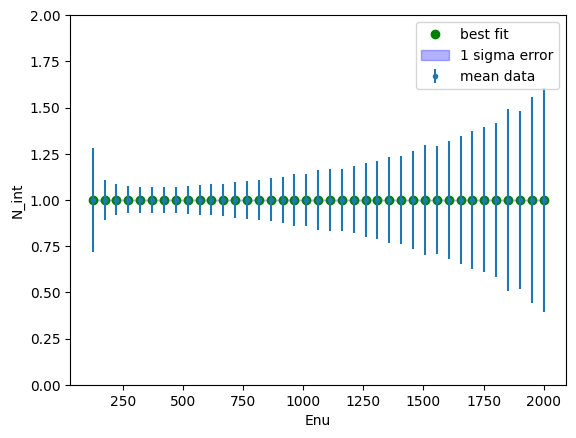

In [16]:
# This plot is to see the relative error of the ML fit
# plt.plot(x_fit,mean_fit/mean_fit,'go',label='best fit')
# plt.fill_between(x_fit,(mean_fit+sigma_fit)/mean_fit,(mean_fit-sigma_fit)/mean_fit,label='1 sigma error',color = 'blue',alpha=0.3)

plt.plot(Enu,mean_fit/mean_fit,'go',label='best fit')
plt.fill_between(Enu,(mean_fit+sigma_fit)/mean_fit,(mean_fit-sigma_fit)/mean_fit,label='1 sigma error',color = 'blue',alpha=0.3)

plt.errorbar(Enu,data/data,yerr = np.sqrt(sig_tot)/data,label = 'mean data',fmt = '.')


plt.xlabel('Enu')
plt.ylabel('N_int')
plt.legend()
plt.ylim(0,2)
plt.show()